## Singular Value Decomposition ##

## $X=\sum \sigma u v^t$ ##

#### 載入相關套件 ####

In [288]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.datasets import fetch_openml
import pandas as pd
import scipy.io

#### 習題 1：將一張圖像 X 利用 SVD 的 “Rank q approximation”，能達到壓縮的目的並保持圖像的品質。比較下列幾種對於圖像矩陣 X 的重組安排，並進行 “Rank q approximation”，在同樣的壓縮比之下，觀察還原後的圖像品質哪個最好？能說出理由嗎？ ####
1. X 不變
2. 將 X 以 8 $\times$ 8 小圖（patch）進行切割，再將每個小圖拉成 64 $\times$ 1 的向量，最後重組這些向量並排成新的 64 $\times$ N 矩陣。
3. 同上，小圖大小為  16 $\times$ 16/per patch。
4. 同上，但分割成  32 $\times$ 32/per patch。
5. 其他。譬如，隨機挖取 X 裡面的 patch，可重疊，小圖大小自訂、數量隨意。
6. 將 X 以 8 $\times$ 8 小圖（patch）進行切割，但每次以一單位為移動距離，再將每個小圖拉成 64 $\times$ 1 的向量，最後重組這些向量並排成新的 64 $\times$ N 矩陣。 

如何呈現最後的比較結果，請自行決定，譬如，將圖像並列比較。圖像可以選 Lenna， 也可以自行決定 

#### 1.X 不變 ####

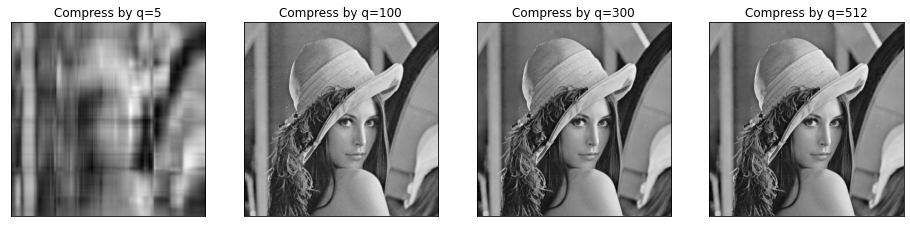

In [322]:
imgfile = '/Users/liang/Documents/淺度機器學習/資料集/lenna.png' # 512x512x3 (512為大小，3:R,G,B)
# imgfile = '/Users/liang/Downloads/afghan-children-little-girl-brunette-wallpaper-preview.jpg'
X = mpimg.imread(imgfile)
# plt.imshow(X)#原圖
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
# plt.imshow(X)
N, p = X.shape
U, E, VT = svd(X, full_matrices = False)
q=np.array([5,100,300,512]).astype('int')#分別取512,50,100,300個主成分
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, r in enumerate(q):#影像壓縮
    #欄@對角矩陣@列
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    ax[i].imshow(Xq, cmap = 'gray')
    ax[i].set_title('Compress by q={}'.format(r))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

 \<sol\> 可觀測出取越小的主成分(q)，經過壓縮的圖片品質越不好;當q取512時（full rank），壓縮後的圖片品質最清晰。 

#### 2.將 X 以 8 $\times$ 8 小圖（patch）進行切割，再將每個小圖拉成 64 $\times$ 1 的向量，最後重組這些向量並排成新的 64 $\times$ N 矩陣。 ####

首先寫一個函式 straighten( ) 用來把一格格 8* 8 小圖拉成 64*1 的向量，並把這些向量放進矩陣 M

In [290]:
def straighten(X,pathsize,figsize):
    X = mpimg.imread(X)
    # plt.imshow(X)
    if len(X.shape) > 2:
        X = np.mean(X, axis=2) 
    M=[]
    for j in np.arange(0,int(figsize/pathsize)):
        for s in np.arange(0,int(figsize/pathsize)):
            d=X[j*pathsize:(j+1)*pathsize,s*pathsize:(s+1)*pathsize]
            M.append(np.array(d).reshape(-1,1))      
    M=np.array(M)
    M = np.squeeze(M, axis=2)
    M=M.T
    # plt.imshow(M)
    print("M shape={}".format(M.shape))
    return(M)

再把矩陣 M 拿去做 SVD 得到 Xq，再把 Xq 排回 一塊塊 8*8 的小矩陣，完成得到壓縮過後的圖片

M shape=(64, 4096)


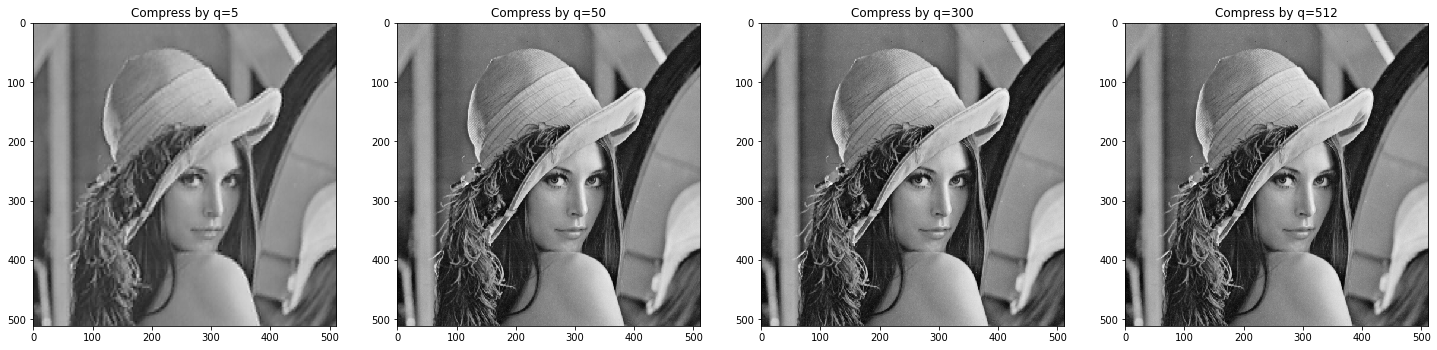

In [291]:
M=straighten('/Users/liang/Documents/淺度機器學習/資料集/lenna.png',8,512)
U, E, VT = svd(M, full_matrices = False)#對新矩陣做rank q approximation
q=np.array([5,50,300,512]).astype('int')#近似矩陣取q=5,100,300,512
b=np.arange(1,65)
c=np.arange(1,65)
a=[]
fig ,ax =plt.subplots(1,4,figsize=(25,25))
for o,v in enumerate(q):
    Xq = U[:, :v] @ np.diag(E[:v]) @ VT[:v, :]
    F=np.zeros((8,512))
    for j,i in enumerate(c):
        K=np.zeros((8,8))
        for w,r in enumerate(b):
            K=np.c_[K,Xq[:,(64*j)+w].reshape(8,8)]
        K=np.delete(K,[i for i in np.arange(0,8)],axis=1) 
        # print(F.shape)
        F=np.r_[F,K]
    F=np.delete(F,[i for i in np.arange(0,8)],axis=0)
    a.append(F)
    plt.subplot(1,4,o+1)
    plt.title('Compress by q={}'.format(v))
    plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
plt.show()

 \<sol\> 可觀測出取越小的主成分(q)，經過壓縮的圖片品質越不好;當q取512時（full rank），壓縮後的圖片品質最清晰。 

3. 同上，小圖大小為  16 $\times$ 16/per patch。

M shape=(256, 1024)


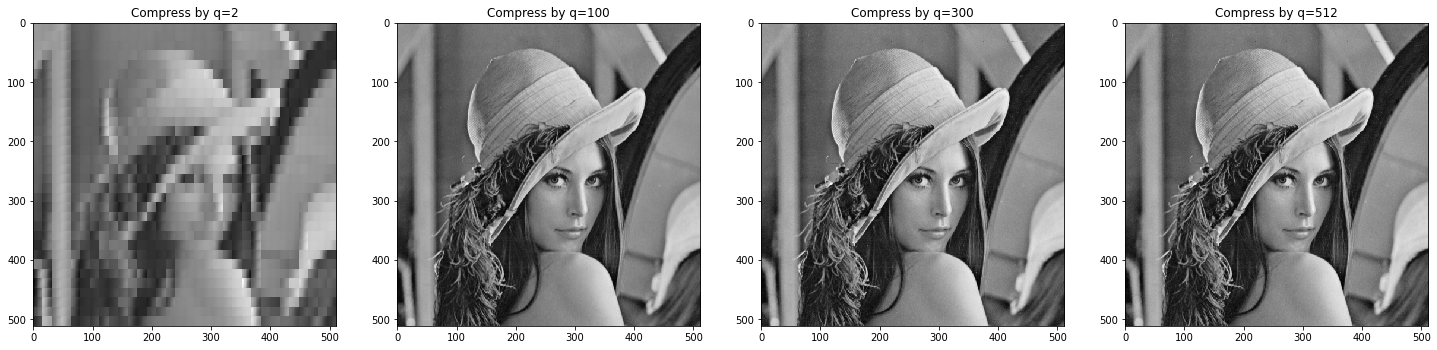

In [292]:
M=straighten('/Users/liang/Documents/淺度機器學習/資料集/lenna.png',16,512)
U, E, VT = svd(M, full_matrices = False)
q=np.array([2,100,300,512]).astype('int')
b=np.arange(1,33)
c=np.arange(1,33)
a=[]
fig ,ax =plt.subplots(1,4,figsize=(25,25))
for o,v in enumerate(q):
    Xq = U[:, :v] @ np.diag(E[:v]) @ VT[:v, :]
    F=np.zeros((16,512))
    for j,i in enumerate(c):
        K=np.zeros((16,16))
        for w,r in enumerate(b):
            K=np.c_[K,Xq[:,(32*j)+w].reshape(16,16)]
        K=np.delete(K,[i for i in np.arange(0,16)],axis=1) 
        F=np.r_[F,K]
    F=np.delete(F,[i for i in np.arange(0,16)],axis=0)
    a.append(F)
    plt.subplot(1,4,o+1)
    plt.title('Compress by q={}'.format(v))
    plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
plt.show()

 \<sol\> 可觀測出取越小的主成分(q)，經過壓縮的圖片品質越不好;當q取512時（full rank），壓縮後的圖片品質最清晰。 

4. 同上，但分割成  32 $\times$ 32/per patch。

M shape=(1024, 256)


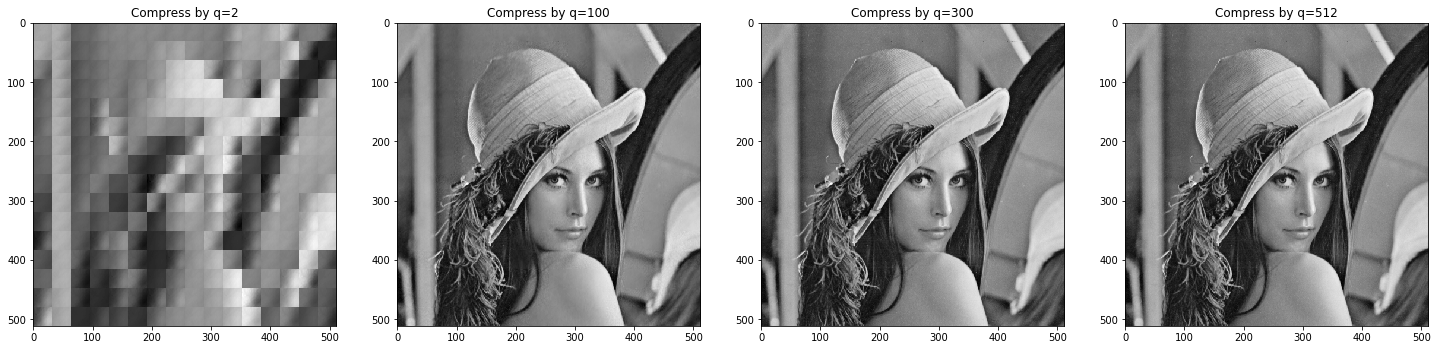

In [293]:
M=straighten('/Users/liang/Documents/淺度機器學習/資料集/lenna.png',32,512)
U, E, VT = svd(M, full_matrices = False)#對新矩陣做rank q approximation
q=np.array([2,100,300,512]).astype('int')#近似矩陣取q=5,100,300,512
b=np.arange(1,17)
c=np.arange(1,17)
a=[]
fig ,ax =plt.subplots(1,4,figsize=(25,25))
for o,v in enumerate(q):
    Xq = U[:, :v] @ np.diag(E[:v]) @ VT[:v, :]
    F=np.zeros((32,512))
    for j,i in enumerate(c):
        K=np.zeros((32,32))
        for w,r in enumerate(b):
            K=np.c_[K,Xq[:,(16*j)+w].reshape(32,32)]
        K=np.delete(K,[i for i in np.arange(0,32)],axis=1) 
        F=np.r_[F,K]
    F=np.delete(F,[i for i in np.arange(0,32)],axis=0)
    a.append(F)
    plt.subplot(1,4,o+1)
    plt.title('Compress by q={}'.format(v))
    plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
plt.show()

 \<sol\> 可觀測出取越小的主成分(q)，經過壓縮的圖片品質越不好;當q取512時（full rank），壓縮後的圖片品質最清晰。 

5. 其他。譬如，隨機挖取 X 裡面的 patch，可重疊，小圖大小自訂、數量隨意。

首先寫一個可以找出任意數其因數的函式 find_common_factors( )，為了找出照片大小為 512 的因數。

In [294]:
def find_common_factors(num):
    common_factors = []
    for i in range(1, num+1):
        if num % i == 0:
            common_factors.append(i)
    return common_factors
find_common_factors(512)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

再寫一個函式 wang( ) 完成本題

In [295]:
def wang(X,t):
    '''
    X:image path
    s:patch size
    t:number of components(list)
    '''
    X = mpimg.imread(X)
    if len(X.shape) > 2:
        X = np.mean(X, axis=2)
    s=np.random.choice(find_common_factors(X.shape[0]))#隨機抽取 path size 

    M=[]
    for j in np.arange(0,int(512/s)):
        for b in np.arange(0,int(512/s)):
            d=X[j*s:(j+1)*s,b*s:(b+1)*s]
            M.append(np.array(d).reshape(-1,1))
    M=np.array(M)
    M = np.squeeze(M, axis=2)
    M=M.T
    # return(M.shape,s)

    U, E, VT = svd(M, full_matrices = False)
    q=np.array(t).astype('int')
    b=np.arange(1,(512/s)+1)
    c=np.arange(1,(512/s)+1)
    a=[]
    fig ,ax =plt.subplots(1,4,figsize=(25,25))
    for o,v in enumerate(q):
        Xq = U[:, :v] @ np.diag(E[:v]) @ VT[:v, :]
        F=np.zeros((s,512))
        for j,i in enumerate(c):
            K=np.zeros((s,s))
            for w,r in enumerate(b):
                K=np.c_[K,Xq[:,(int(512/s)*j)+w].reshape(s,s)]
            K=np.delete(K,[i for i in np.arange(0,s)],axis=1) 
            F=np.r_[F,K]
        F=np.delete(F,[i for i in np.arange(0,s)],axis=0)
        a.append(F)
        plt.subplot(1,4,o+1)
        plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
        plt.title('Compress by q={}'.format(v))
    plt.show()
    return(f'patch size:{s,s}')

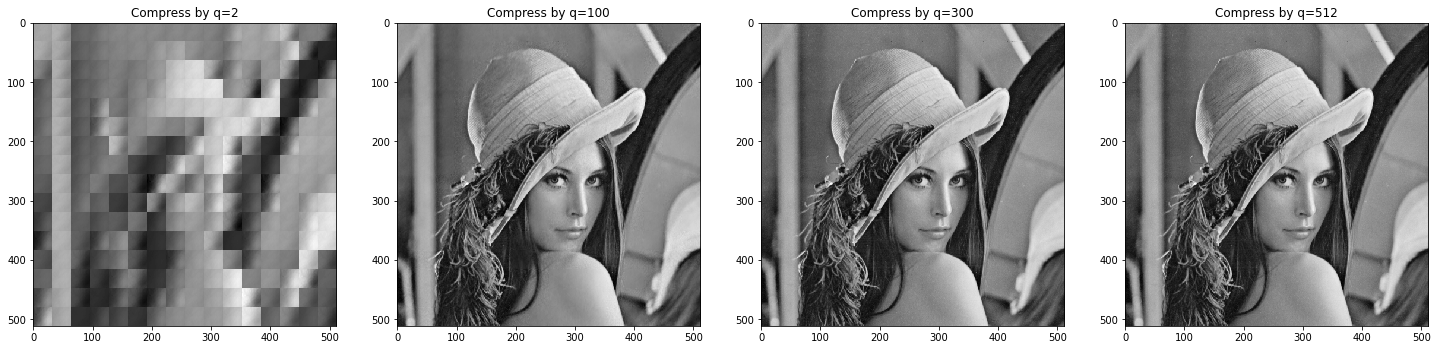

'patch size:(32, 32)'

In [296]:
wang(X='/Users/liang/Documents/淺度機器學習/資料集/lenna.png',t=[2,100,300,512])

### 6. 將 X 以 8 $\times$ 8 小圖（patch）進行切割，但每次以一單位為移動距離，再將每個小圖拉成 64 $\times$ 1 的向量，最後重組這些向量並排成新的 64 $\times$ N 矩陣。 

In [297]:
M=[]
for j in np.arange(505):
    for s in np.arange(505):
        d=X[j:(j+8),s:(s+8)]
        M.append(np.array(d).reshape(64,1))
M=np.array(M)
M = np.squeeze(M, axis=2)
M=M.T
print(M.shape)
# plt.imshow(M)

(64, 255025)


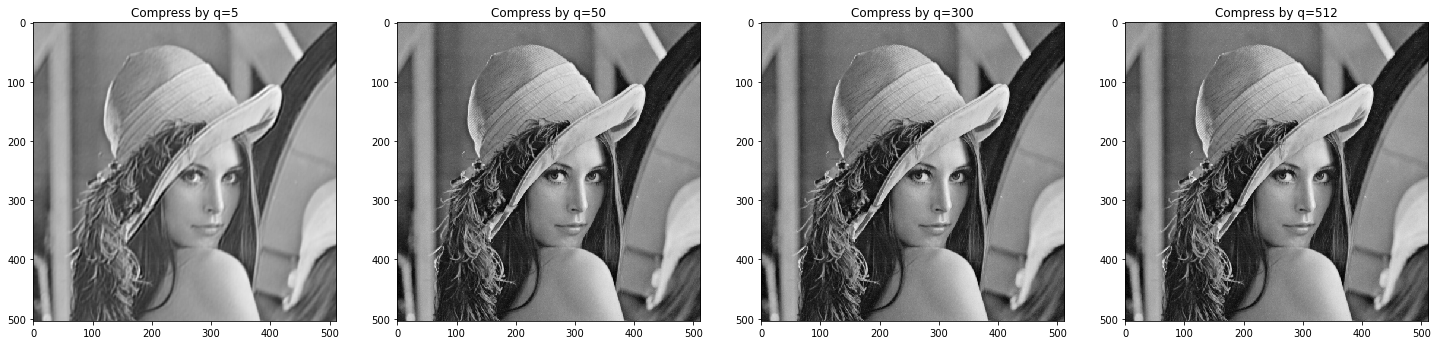

In [298]:
U, E, VT = svd(M, full_matrices = False)
q=np.array([5,50,300,512]).astype('int')
b=np.arange(1,505)
c=np.arange(1,505)
a=[]
fig ,ax =plt.subplots(1,4,figsize=(25,25))
for o,v in enumerate(q):
    Xq = U[:, :v] @ np.diag(E[:v]) @ VT[:v, :]
    F=np.zeros((8,512))
    for j,i in enumerate(c):
        K=Xq[:,505*(i-1)].reshape(8,8)
        for w,r in enumerate(b):
            K=np.c_[K,Xq[:,(505*j)+(w+1)].reshape(8,8)[:,7]]
        F=np.r_[F,K[7,:].reshape(1,-1)]
    F=np.delete(F,[i for i in np.arange(0,8)],axis=0)
    a.append(F)
    plt.subplot(1,4,o+1)
    plt.title('Compress by q={}'.format(v))
    plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
plt.show()

 \<sol\> 可觀測出取越小的主成分(q)，經過壓縮的圖片品質越不好;當q取512時（full rank），壓縮後的圖片品質最清晰。 

### 不同切割方式的大比拼 ###

M shape=(1024, 256)
M shape=(256, 1024)
M shape=(64, 4096)


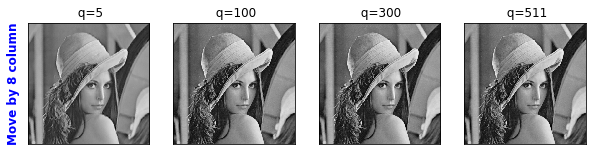

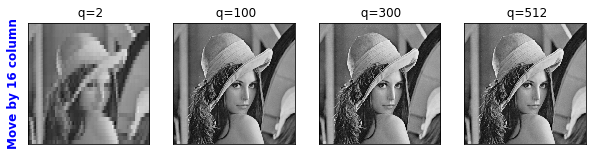

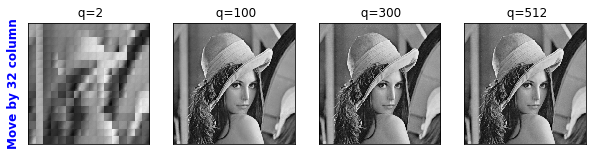

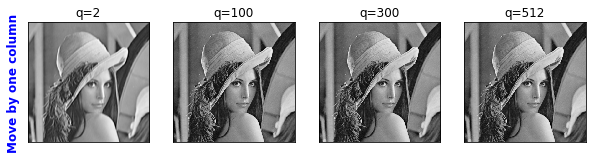

In [299]:
M3=straighten('/Users/liang/Documents/淺度機器學習/資料集/lenna.png',32,512)
M2=straighten('/Users/liang/Documents/淺度機器學習/資料集/lenna.png',16,512)
M1=straighten('/Users/liang/Documents/淺度機器學習/資料集/lenna.png',8,512)
M=[M1,M2,M3]
U1, E1, VT1 = svd(M1, full_matrices = False)
U2, E2, VT2 = svd(M2, full_matrices = False)
U3, E3, VT3 = svd(M3, full_matrices = False)
q=np.array([5,100,300,511]).astype('int')#近似矩陣取q=5,100,300,512
b=np.arange(1,65)
c=np.arange(1,65)
a=[]
fig ,ax =plt.subplots(1,4,figsize=(10,10))
for o,v in enumerate(q):
    Xq = U1[:, :v+1] @ np.diag(E1[:v+1]) @ VT1[:v+1, :]
    F=np.zeros((8,512))
    for j,i in enumerate(c):
        K=np.zeros((8,8))
        for w,r in enumerate(b):
            K=np.c_[K,Xq[:,(64*j)+w].reshape(8,8)]
        K=np.delete(K,[i for i in np.arange(0,8)],axis=1) 
        # print(F.shape)
        F=np.r_[F,K]
    F=np.delete(F,[i for i in np.arange(0,8)],axis=0)
    a.append(F)
    plt.subplot(1,4,o+1)
    plt.title(' q={}'.format(v))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
ax[0].set_ylabel('Move by 8 column', fontsize=12,fontweight='bold',color='b')
plt.show()
q=np.array([2,100,300,512]).astype('int')#近似矩陣取q=5,100,300,512
b=np.arange(1,33)
c=np.arange(1,33)
a=[]
fig ,ax =plt.subplots(1,4,figsize=(10,10))
for o,v in enumerate(q):
    Xq = U2[:, :v] @ np.diag(E2[:v]) @ VT2[:v, :]
    F=np.zeros((16,512))
    for j,i in enumerate(c):
        K=np.zeros((16,16))
        for w,r in enumerate(b):
            K=np.c_[K,Xq[:,(32*j)+w].reshape(16,16)]
        K=np.delete(K,[i for i in np.arange(0,16)],axis=1) 
        F=np.r_[F,K]
    F=np.delete(F,[i for i in np.arange(0,16)],axis=0)
    a.append(F)
    plt.subplot(1,4,o+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(' q={}'.format(v))
    plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
ax[0].set_ylabel('Move by 16 column', fontsize=12,fontweight='bold',color='b')
plt.show()
q=np.array([2,100,300,512]).astype('int')
b=np.arange(1,17)
c=np.arange(1,17)
a=[]
fig ,ax =plt.subplots(1,4,figsize=(10,10))
for o,v in enumerate(q):
    Xq = U3[:, :v] @ np.diag(E3[:v]) @ VT3[:v, :]
    F=np.zeros((32,512))
    for j,i in enumerate(c):
        K=np.zeros((32,32))
        for w,r in enumerate(b):
            K=np.c_[K,Xq[:,(16*j)+w].reshape(32,32)]
        K=np.delete(K,[i for i in np.arange(0,32)],axis=1) 
        F=np.r_[F,K]
    F=np.delete(F,[i for i in np.arange(0,32)],axis=0)
    a.append(F)
    plt.subplot(1,4,o+1)
    plt.title(' q={}'.format(v))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
ax[0].set_ylabel('Move by 32 column', fontsize=12,fontweight='bold',color='b')
plt.show()
X = '/Users/liang/Documents/淺度機器學習/資料集/lenna.png'
X = mpimg.imread(X)
if len(X.shape) > 2:
    X = np.mean(X, axis=2)
M=[]
for j in np.arange(505):
    for s in np.arange(505):
        d=X[j:(j+8),s:(s+8)]
        M.append(np.array(d).reshape(64,1))
M=np.array(M)
M = np.squeeze(M, axis=2)
M=M.T
U, E, VT = svd(M, full_matrices = False)#對新矩陣做rank q approximation
q=np.array([2,100,300,512]).astype('int')#近似矩陣取q=5,100,300,512
b=np.arange(1,505)
c=np.arange(1,505)
a=[]
fig ,ax =plt.subplots(1,4,figsize=(10,10))
for o,v in enumerate(q):
    Xq = U[:, :v] @ np.diag(E[:v]) @ VT[:v, :]
    F=np.zeros((8,512))
    for j,i in enumerate(c):
        K=Xq[:,505*(i-1)].reshape(8,8)
        for w,r in enumerate(b):
            K=np.c_[K,Xq[:,(505*j)+(w+1)].reshape(8,8)[:,7]]
        F=np.r_[F,K[7,:].reshape(1,-1)]
    F=np.delete(F,[i for i in np.arange(0,8)],axis=0)
    a.append(F)
    plt.subplot(1,4,o+1)
    plt.xticks([])
    plt.yticks([])
    plt.title('q={}'.format(v))
    plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
ax[0].set_ylabel('Move by one column', fontsize=12,fontweight='bold',color='b')
plt.show()


\<sol\> 由以上4 $*$ 4的子圖可觀測出，當固定相同主成分 q 時，切割越小的path size 其圖片壓縮過後的品質越好，而 patch size 越大，則壓縮過後的品質較差。同時，相比一次以一個正方形(k * k patch size)來做切割 ; 一次移動一個單位的方式，壓縮過的圖片品質最好，呈現在最下面一列。而可觀測出主成分 q 取的越小，壓縮後的品質越差，其原因是因為損失的資料越多。

#### 長方形圖片的範例 ####

1. 原圖去跑 SVD

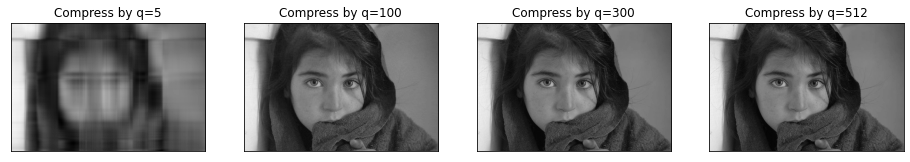

In [300]:
imgfile = '/Users/liang/Documents/淺度機器學習/資料集/afghan-children-little-girl-brunette-wallpaper-preview.jpg' # 512x512x3 (512為大小，3:R,G,B)
# imgfile = '/Users/liang/Downloads/afghan-children-little-girl-brunette-wallpaper-preview.jpg'
X = mpimg.imread(imgfile)
# plt.imshow(X)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
# plt.imshow(X)#X(482*728)
N, p = X.shape
U, E, VT = svd(X, full_matrices = False)
# q = np.array([p/4, p/8, p/16]).astype('int')
q=np.array([5,100,300,512]).astype('int')#分別取512,50,100,300個主成分
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
# fig.suptitle('Move by one column', fontsize=16)
for i, r in enumerate(q):#影像壓縮
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    ax[i].imshow(Xq, cmap = 'gray')
    ax[i].set_title('Compress by q={}'.format(r))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

 \<sol\> 可觀測出取越小的主成分(q)，經過壓縮的圖片品質越不好;當q取512時（full rank），壓縮後的圖片品質最清晰。 

#### 2. 將 X 以 2 $\times$ 2 小圖（patch）進行切割，再將每個小圖拉成 4 $\times$ 1 的向量，最後重組這些向量並排成新的 4 $\times$ N 矩陣。 ####

* 因為長方形圖片的長和寬長度不一樣，故要以正方形來做切割時需要找到長和寬的公因數來做 patch size，這邊以公因數 2 當做 patch size 來做範例。

In [301]:
M=[]
for j in np.arange(0,int(482/2)):
    for s in np.arange(0,int(728/2)):
        # d=X[s*2:(s+1)*2,0*2:(0+1)*2]
        d=X[j*2:(j+1)*2,s*2:(s+1)*2]
        # print(d)
        M.append(d.reshape(4,1)) 
M=np.array(M)
M = np.squeeze(M)
M=M.T
print(M.shape)

(4, 87724)


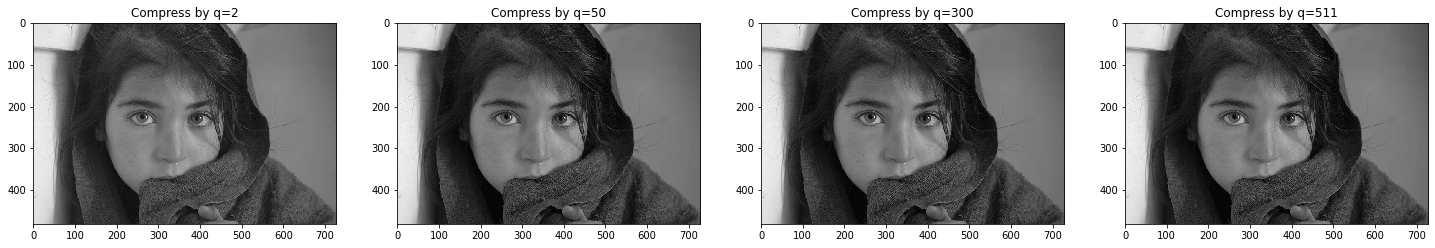

In [302]:
U, E, VT = svd(M, full_matrices = False)#對新矩陣做rank q approximation
q=np.array([2,50,300,511]).astype('int')#近似矩陣取q=5,100,300,512
c=np.arange(1,int(482/2)+1)
b=np.arange(1,int(728/2)+1)
a=[]
fig ,ax =plt.subplots(1,4,figsize=(25,25))
for o,v in enumerate(q):
    Xq = U[:, :v+1] @ np.diag(E[:v+1]) @ VT[:v+1, :]
    F=np.zeros((2,728))
    for j,i in enumerate(c):
        K=np.zeros((2,2))
        for w,r in enumerate(b):
            K=np.c_[K,Xq[:,(364*j)+w].reshape(2,2)]
        K=np.delete(K,[i for i in np.arange(0,2)],axis=1) 
        # print(K.shape)
        F=np.r_[F,K]
    F=np.delete(F,[i for i in np.arange(0,2)],axis=0)
    # F=F.T
    a.append(F)
    plt.subplot(1,4,o+1)
    plt.title('Compress by q={}'.format(v))
    plt.imshow(np.array(a[o]), cmap = 'gray', interpolation = "nearest")
# # ax[o].set_title('q={}'.format(v))
plt.show()

 \<sol\> 可觀測出取越小的主成分(q)，經過壓縮的圖片品質越不好;當q取512時（full rank），壓縮後的圖片品質最清晰。 

#### 習題 2：處理大量影像前，有必要觀看影像圖，以確定能掌握將要處理的影像及其資料型態。以 70000 張手寫圖像為例，每個數字約 7000 字，需要寫一段程式碼來觀察這些手寫數字的影像與品質，且每次執行都能隨機觀看到不同的影像，如下圖左與圖右的影像不同。請靜下心來仔細寫這段程式碼，可以按下圖的方式呈現，或用自己的方式都歡迎。類似像這樣的程式基本功事非常重要且必要的。 ####

下載資料集

In [325]:
X, y = fetch_openml('mnist_784', return_X_y = True)#X為dataframe,y為series
X=X.T# 配合本文對於圖像矩陣的定義 pxN

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


用 函數 montage( ) 來把資料呈現成一張張圖片

In [304]:
def montage(A, m, n): 
    '''
    Create a montage matrix with mn images
    Inputs:
    A: original pxN image matrix with N images (p pixels), N > mn
    m, n: m rows & n columns, total mn images
    Output:
    M: montage matrix containing mn images
    '''
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz 
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
                A[:, i*n+j].reshape(sz, sz)
    return M

展現從全部資料中只取出數字 7 的部分，並隨機抽取 50 個來畫圖呈現

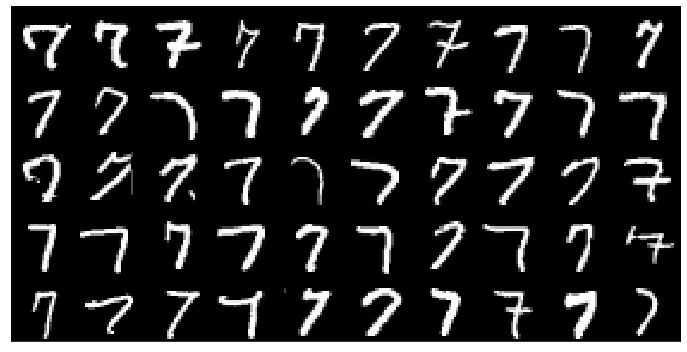

In [305]:
digit_to_show = '7'
idx = y[y==digit_to_show].index#有7293個7 #y是對應的標籤(y:0~9)
m,n=10,5 #A mxn montage(totalmnimages)
N=idx.shape[0]
size=m*n
a=np.random.choice(np.arange(N), replace=False, size=size)
idx[a]
Digit = X.iloc[:, idx[a]]#784x50
plt.figure(figsize = (12, 12))
M = montage(np.array(Digit), n, m)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest') 
plt.xticks([])
plt.yticks([])
plt.show()
# print(M.shape)

展現從全部資料  0~9 ， 並分別隨機抽取 50 個來畫圖呈現

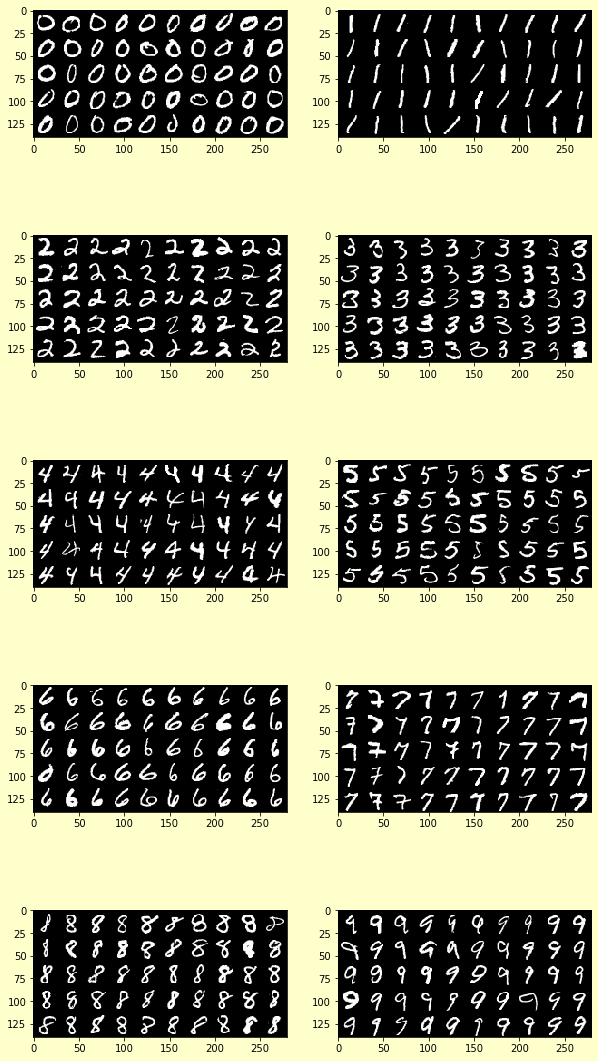

In [306]:
digit_to_show = ['0','1','2','3','4','5','6','7','8','9']
fig = plt.figure(figsize=(10, 20),facecolor='#FFFFCB') 
for i,r in enumerate(digit_to_show):
    idx = y[y==r].index#有7293個7 #y是對應的標籤(y:0~9)
    m,n=10,5 #Amxnmontage(totalmnimages)
    N=idx.shape[0]
    size=m*n
    a=np.random.choice(np.arange(N), replace=False, size=size)
    Digit = X.iloc[:, idx[a]]#784x7141
    plt.subplot(5,2,i+1)
    M = montage(np.array(Digit), n, m)
    plt.imshow(M, cmap = 'gray', interpolation = 'nearest') 
plt.show()

進行兩次隨機抽樣，來確認抽樣方式是否正確

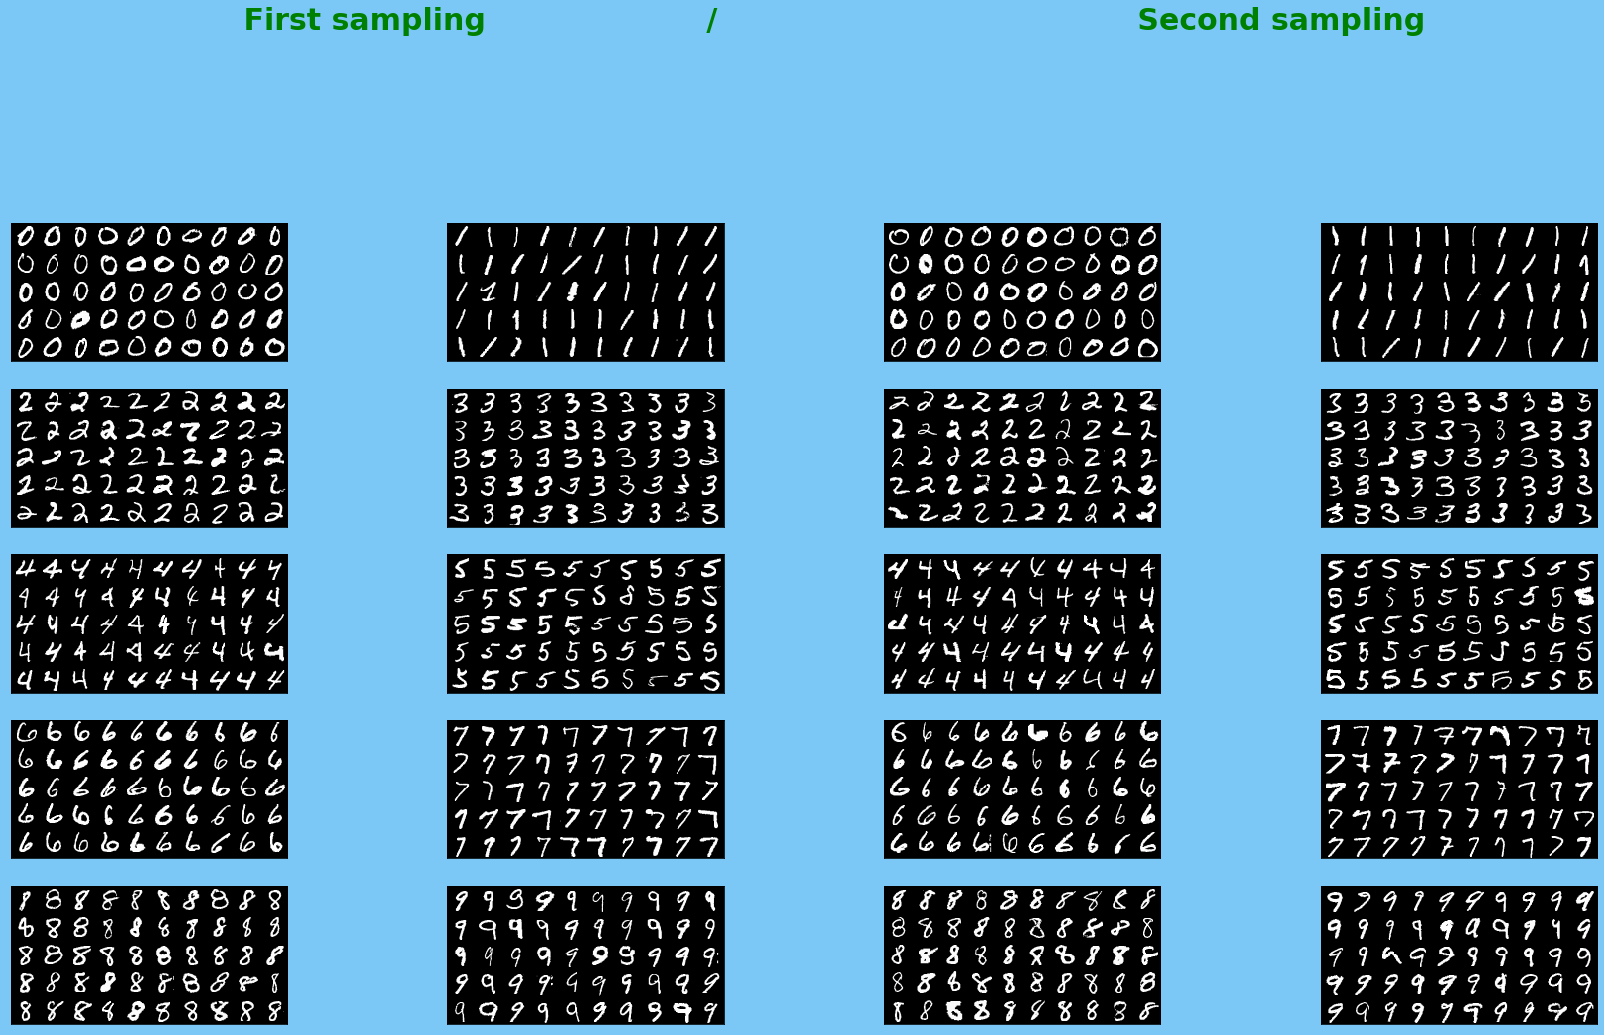

In [307]:
digit_to_show = ['0','1','0','1','2','3','2','3','4','5','4','5','6','7','6','7','8','9','8','9']
fig = plt.figure(figsize=(30, 30),facecolor='#7BC8F6')
fig.suptitle('           First sampling                     /                                        Second sampling', \
    fontsize=30, fontweight='bold',color='g') 
for i,r in enumerate(digit_to_show):
    idx = y[y==r].index#有7293個7 #y是對應的標籤(y:0~9)
    m,n=10,5 #A mxn montage(totalmnimages)
    N=idx.shape[0]
    size=m*n
    a=np.random.choice(np.arange(N), replace=False, size=size)
    Digit = X.iloc[:, idx[a]]#784x7141
    plt.subplot(10,4,i+1)
    M = montage(np.array(Digit), n, m)
    plt.imshow(M, cmap = 'gray', interpolation = 'nearest') 
    plt.xticks([])
    plt.yticks([])
plt.show()

\<sol\> 可觀測出兩次抽樣的結果不一致，故抽樣正確！

#### 習題 3：每張大小 28×28 的手寫數字圖像 70000 張，不經壓縮前的儲存空間為 54.88 M Bytes。若進行 SVD 的 “Rank q approximation”，則壓縮倍數由 q 決定。寫一支程式，當調整 q 值時，可以算出壓縮的倍數，並同時顯示原圖與壓縮後還原的圖各 100 張做為比較（任選 100 張）。另外 q 的選擇可以根據 $\sigma_1$, $\sigma_2$, $\cdots$,  $\sigma_r$ 的「能量配置」來決定，或說決定 q 之後，可以計算所採用的主成分的能量佔比，本題也可以順便列印出這個佔比。 ####

In [324]:
def calratio(A,q):
    '''
    A:image
    q:num of feature
    '''
    orgsize=A.shape[0]*A.shape[1]
    componsize=q*A.shape[0]
    compresssize=q*A.shape[1]
    ratio=orgsize/(componsize+compresssize)
    compratio=(A.shape[0]*A.shape[1])/(q*A.shape[1])
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    # digit_to_show=num
    # idx=y[y==num].index
    # Digit=X.iloc[:,idx]
    # M=montage(np.array(Digit),10,10)
    M=montage(np.array(X),10,10)
    ax[0].imshow(M,cmap='GnBu')
    ax[0].set_title('Uncompress')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    #------------------壓縮過的----------------
    U,E,VT=svd(X,full_matrices=False)
    Xq=U[:,:q]@np.diag(E[:q])@VT[:q,:]
    ax[1].imshow(montage(np.array(Xq),10,10),cmap='GnBu')
    ax[1].set_title('Compress by q={} \n Compression ratio={:.2f} \n Component ratio={}'.format(q,ratio,compratio))
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()

    # return(f'compression ratio={ratio}')


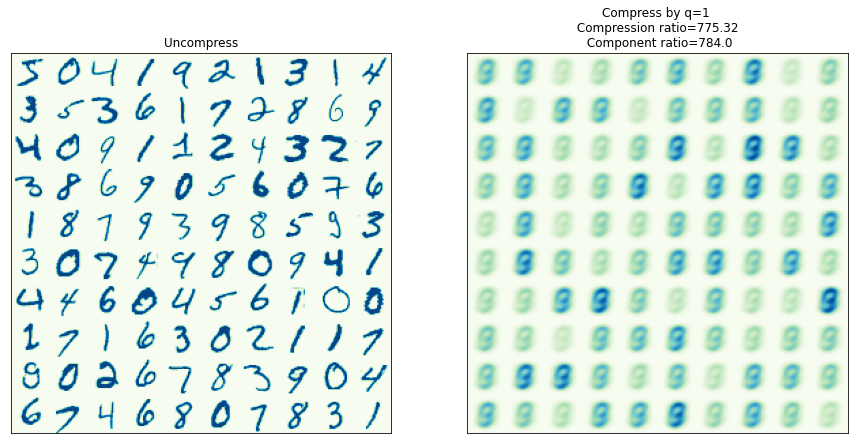

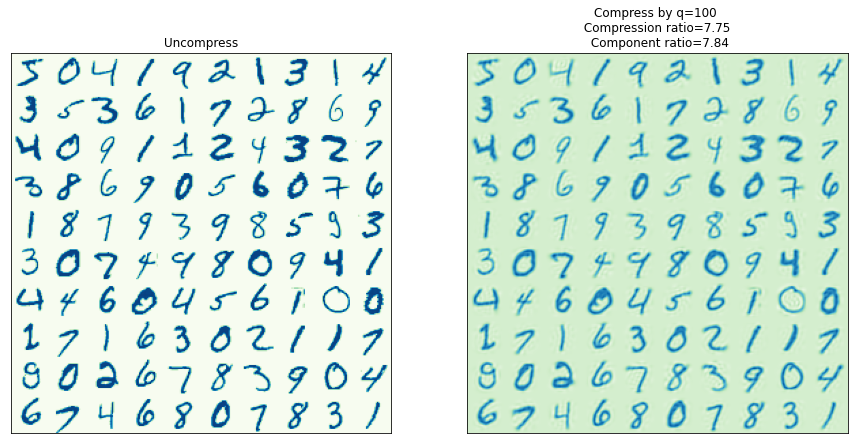

In [326]:
calratio(X,q=35)
calratio(X,q=100)

\<sol\> 由上圖可觀測出，當主成分 q 取得越小時，其壓縮比、主成分能量佔比越大，同時壓縮過後的圖像呈現品質較差，不過好處是能節省較多的儲存空間;相反的當主成分 q 取得越大時，其壓縮比、主成分能量佔比越小，同時壓縮過後的圖像呈現品質較好，不過壞處是能節省較少的儲存空間。

#### 習題 1：有 5 張經過加密的影像圖（壓縮檔下載），其加密的方式採 Yale Faces 38 人 2410 張人臉圖像矩陣 $X$ 的 SVD，即 $X = U \Sigma$ $V^T$，取 $U$ 作為影像加密的工具，即假設向量 $x$ 代表一張原圖影像，則 $U[:, 0:q]^T x$ 代表該影像的前 q 個主成分，以此作為加密影像。 ####

1. 請解密這 5 張影像。 


In [310]:
def show_montage(X, n, m, h, w): 
        '''
        X: 影像資料矩陣，每行代表一張影像
        n,m: 每張影像的大小 nxm
        h,w: 建立一個蒙太奇圖陣，大小 figsize=(w,h)
        '''
        fig, axes = plt.subplots(h, w, figsize=(w, h)) 
        if X.shape[1]<w*h:# 影像張數不到 wxh 張，用 0 向量補齊
                X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]
        for i, ax in enumerate(axes.flat):
                ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
                ax.set_xticks([])
                ax.set_yticks([])
        plt.show()

載入人臉資料集

In [311]:
D = scipy.io.loadmat('/Users/liang/Downloads/allFaces.mat')
X = D['faces'] #32256*2410 each column represents an image 
y = np.ndarray.flatten(D['nfaces'])#分別代表每個人的張數
m = int(D['m'])#168
n = int(D['n'])#192
n_persons = int(D['person'])#38個人

38個人的svd分解

In [312]:
avgFace=X.mean(axis=1).reshape(-1,1)
X_avg=X-np.tile(avgFace,(1,X.shape[1]))
U,E,VT=svd(X_avg,full_matrices=False)
# U,E,VT=svd(X,full_matrices=False)

加密的樣子

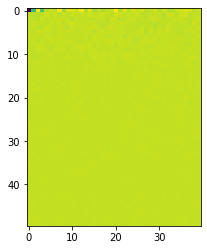

In [313]:
imagedata=pd.read_csv('/Users/liang/Documents/淺度機器學習/資料集/五張加密的影像.csv')
firstimage=np.array(imagedata.iloc[:, 0])#Z(2000*1)
plt.imshow(firstimage.reshape(50,40))

解密還原成原圖

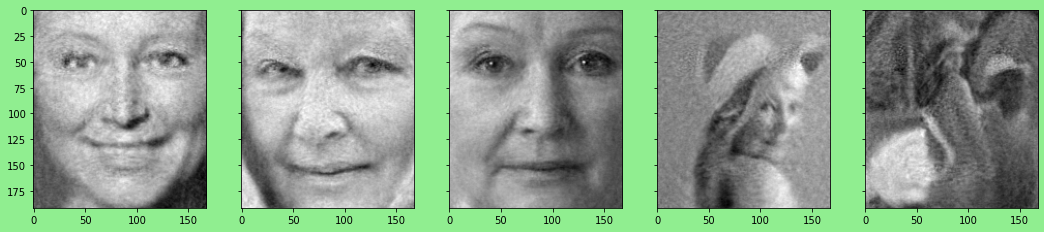

In [314]:
q=2000
m,n=168,192

Xq=np.dot(U[:,0:q],imagedata)
# Xq=np.dot(U[:,0:q],firstimage)
fig,ax=plt.subplots(1,5,figsize=(18,18),facecolor='#90EE90',sharey=True)
for i in range(5):
    ax[i].imshow(Xq[:,i].reshape(m,n).T,cmap='gray')

2. 自行找 5 張照片（大小必須同 Yale Faces 的 192×168 或自行 Resize），含人臉、水果、風景 … 等進行
加密後（q 自選），再解密，觀察這些解密後的影像的效果，是否人臉的表現比較好？其他非人臉影像，如風景影像，能透過由人臉建構的特徵 U 加密嗎？（即解密後能否看到原圖模樣？）

五張圖片的呈現

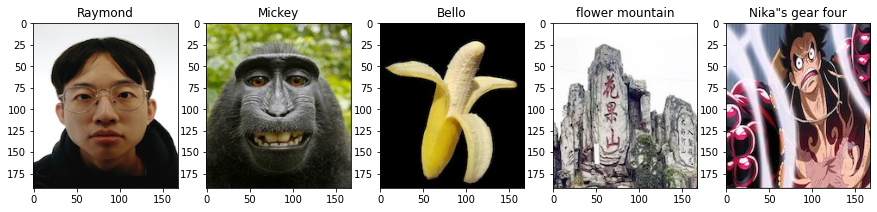

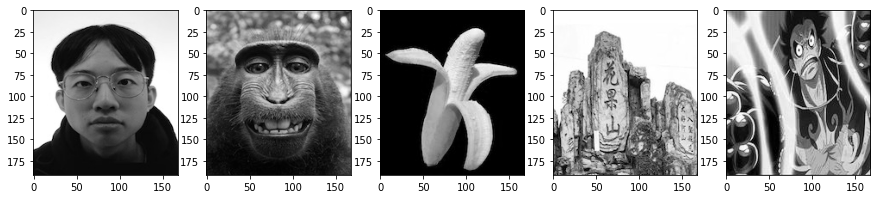

In [323]:
imgfile = '/Users/liang/Downloads/IMG_8460拷貝.JPG' # 192x168x3 (512為大小，3:R,G,B)
X1_lo = mpimg.imread(imgfile)
imgfile = '/Users/liang/Downloads/monkey.jpeg' 
X2_monkey = mpimg.imread(imgfile)
imgfile = '/Users/liang/Downloads/banana.jpeg' 
X3_banana = mpimg.imread(imgfile)
imgfile = '/Users/liang/Downloads/花果山.jpg'
X4_flowersmountain = mpimg.imread(imgfile)
imgfile = '/Users/liang/Downloads/gear4luffy.jpeg' 
X5_luffy = mpimg.imread(imgfile)
images=[X1_lo,X2_monkey,X3_banana,X4_flowersmountain,X5_luffy]
#未經壓縮過的原圖呈現
names=['Raymond','Mickey','Bello','flower mountain','Nika"s gear four']
fig,ax=plt.subplots(1,5,figsize=(15,15))
for r,i in enumerate(images):
    ax[r].imshow(i)
    ax[r].set_title(names[r])
plt.show()
#壓縮成黑白圖片
fig,ax=plt.subplots(1,5,figsize=(15,15))
for r,i in enumerate(images):
   if len(i.shape) > 2:
    i = np.mean(i, axis=2) 
    ax[r].imshow(i,cmap='gray')
plt.show()

壓縮成黑白照片

In [316]:
if len(X1_lo.shape) > 2:
    X1_lo = np.mean(X1_lo, axis=2)
if len(X2_monkey.shape) > 2:
    X2_monkey = np.mean(X2_monkey, axis=2)
if len(X3_banana.shape) > 2:
    X3_banana = np.mean(X3_banana, axis=2)
if len(X4_flowersmountain.shape) > 2:
    X4_flowersmountain = np.mean(X4_flowersmountain, axis=2)
if len(X5_luffy.shape) > 2:
    X5_luffy= np.mean(X5_luffy, axis=2)

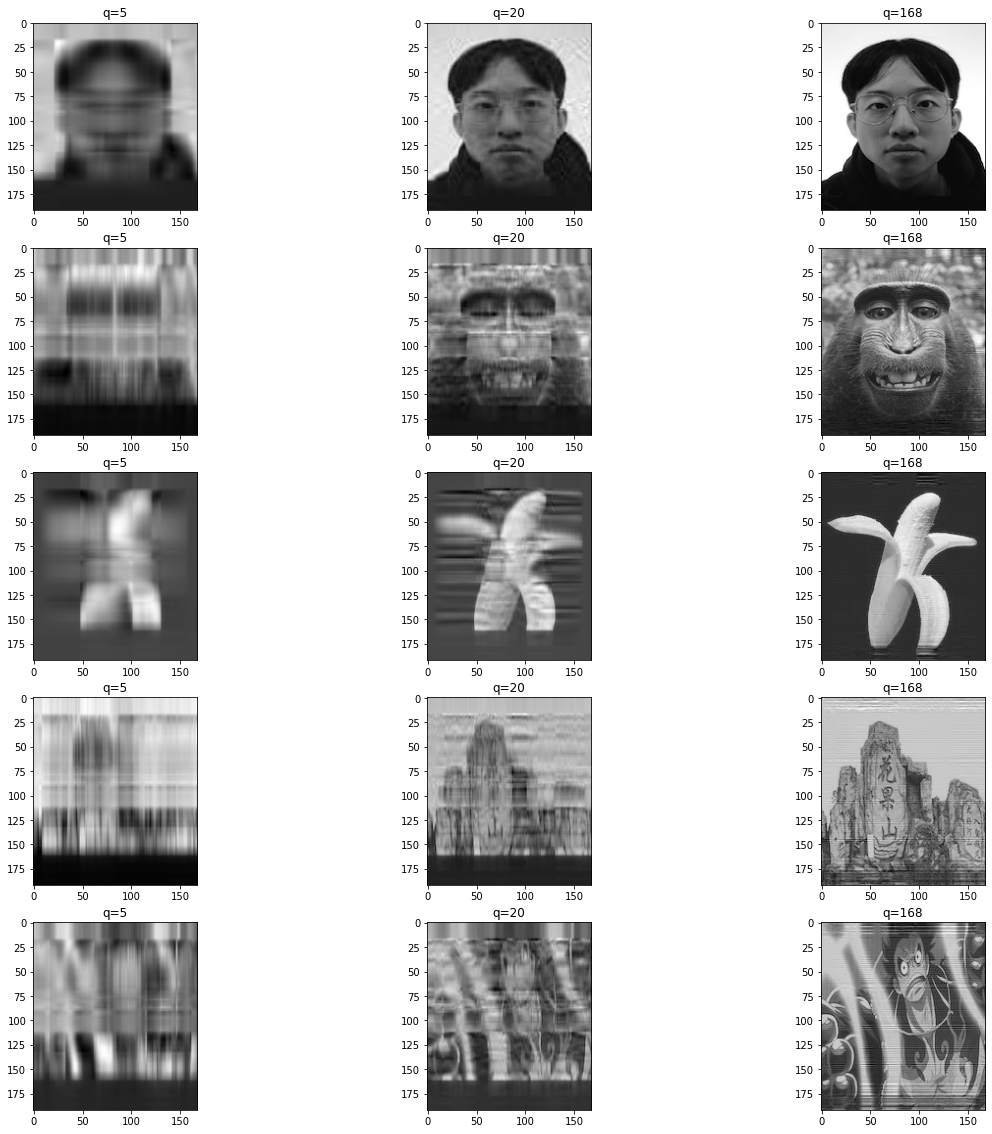

In [317]:
U, E, VT = svd(X1_lo, full_matrices = False)
q=np.array([5,20,168]).astype('int')
data=[X1_lo,X2_monkey,X3_banana,X4_flowersmountain,X5_luffy]
# fig,ax=plt.subplots(1,5,figsize=(8,8))
plt.figure(figsize=(20,20))
for i,r in enumerate(data):
    for w,d in enumerate(q):
        Xq =U[:,:d]@ (U[:,:d].T @ np.array(r))
        plt.subplot(5,3,(i*len(q))+w+1)
        plt.title('q={}'.format(d))
        plt.imshow(Xq,cmap='gray')
plt.show()


\<sol\> 將這五張圖片分別進行加密，再解密，可觀測出當主成分取 q=10 時，人像的照片品質比猴子好，再來是香蕉，接著是魯夫，最後照片品質最差的是風景照（花果山）。

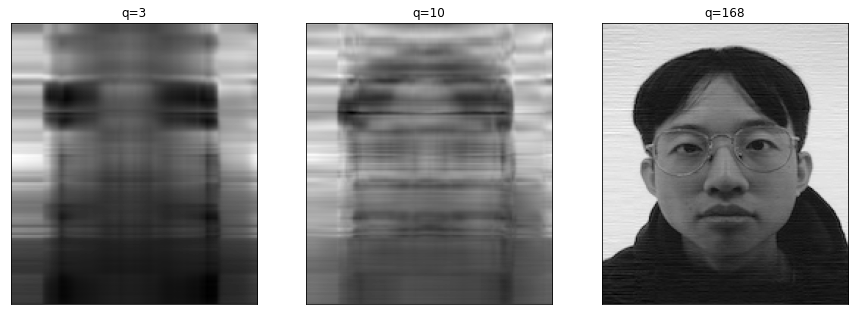

In [320]:
# U,E,VT=svd(X2_monkey,full_matrices=False)
q=np.array([3,10,168])
fig,ax=plt.subplots(1,3,figsize=(15,15))
for i, r in enumerate(q):
    # Xq=U[:,:r]@np.diag(E[:r])@VT[:r,:]
    Xq=U[:,:r]@ (U[:,:r].T @ np.array(X1_lo))#後面兩個矩陣先相乘會比前面兩個矩陣相乘來得快速，因為前面兩個相乘為p*p的矩陣
    ax[i].imshow(Xq,cmap='gray')#x_q=u_q@ u_q^t @x
    ratio=N*p/(U.shape[0]+VT.shape[1])/r
    ax[i].set_title('q={}'.format(r))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

\<sol\>把猴子拿去加密在隔壁同學老羅身上，可觀測出當主成分取 q=10 時，兩張圖片意外的有重合到，甚至有點像野獸巨人(?